In [15]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [16]:
from markov import MarkovChain

# Завдання 1.
Змоделювати ланцюг маркова за відомими перехідними ймовірностями

## 1.

In [17]:
N = 6
P = np.zeros((6,6))
P[0,0] = 0.5
P[0,1] = 0.5
P[1,0] = 0.5
P[1,2] = 0.5
P[2,2] = 0.5
P[2,3] = 0.3
P[2,4] = 0.2
P[3,2] = 0.3
P[3,5] = 0.7
P[4,2] = 0.2
P[4,4] = 0.8
P[5,3] = 0.7
P[5,5] = 0.3
P

array([[0.5, 0.5, 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0.3, 0.2, 0. ],
       [0. , 0. , 0.3, 0. , 0. , 0.7],
       [0. , 0. , 0.2, 0. , 0.8, 0. ],
       [0. , 0. , 0. , 0.7, 0. , 0.3]])

Стани 1,2 - несуттєві. Знайдемо інваріантний розподіл для інших станів

In [18]:
Ps = P[2:, 2:]
np.linalg.eig(Ps)

(array([-0.61700791,  0.38630234,  1.        ,  0.83070557]),
 array([[-0.21384986,  0.83091219, -0.5       , -0.11769949],
        [ 0.77611776, -0.0471091 , -0.5       ,  0.3813423 ],
        [ 0.0301833 , -0.40170021, -0.5       , -0.76663284],
        [-0.5924512 , -0.38210288, -0.5       ,  0.50299003]]))

Бачимо, що власному числу 1 відповідає розподіл $\pi = (0,0,0.25,0.25,0.25,0.25)$.

Перевіримо:

In [19]:
pi = np.array([0,0,1,1,1,1]) / 4
pi @ P

array([0.  , 0.  , 0.25, 0.25, 0.25, 0.25])

Дійсно, $\pi P = \pi$

## 2.
Тепер моделюємо послідовність $X_n$.

- Пробуємо починати з різних станів
- Моделюємо 20 кроків
- Моделюємо кожен варіант 4 рази

Також важливо змінювати зерно генератора випадкових чисел між тестами (або використовувати на всі тести один і той самий генератор без його скидання)

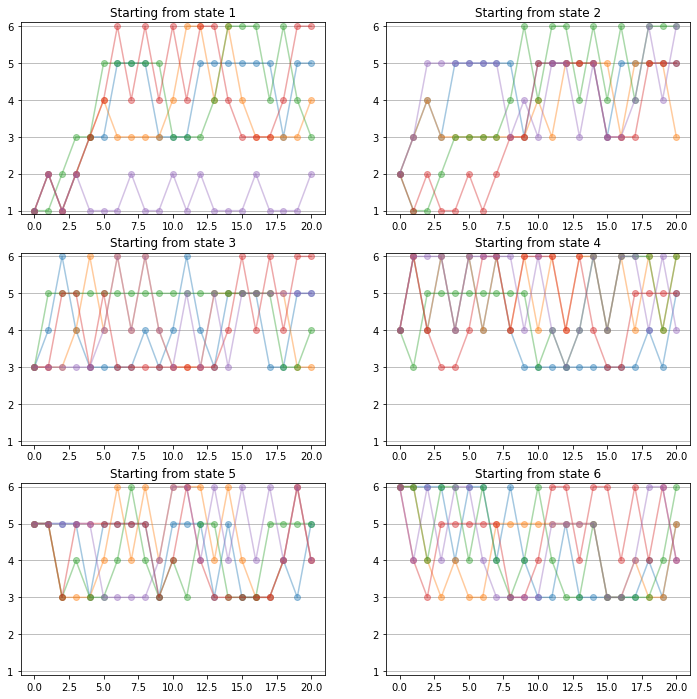

In [38]:
MC = MarkovChain(P, rng_seed=42)
plt.gcf().set_size_inches((12,12))
for init_state in range(6):
    ax = plt.subplot(3,2,init_state+1)
    ax.set_ylim(0.9,6.1)
    ax.grid(True, axis='y')
    ax.set_title(f"Starting from state {init_state+1}")
    for j in range(5):
        MC.setstate(init_state)
        MC.evolve(20)
        ax.plot(np.array(MC.history)+1, '-o', alpha=0.4)


## 3.

In [49]:
state_visits_from0 = np.zeros(6)
for i in range(5):
    MC.setstate(0)
    MC.evolve(2000)
    s, s_n = np.unique(np.array(MC.history), return_counts=True)
    for si, sn in zip(s,s_n):
        state_visits_from0[si] += sn
    
state_visits_from2 = np.zeros(6)
for i in range(5):
    MC.setstate(2)
    MC.evolve(2000)
    s, s_n = np.unique(np.array(MC.history), return_counts=True)
    for si, sn in zip(s,s_n):
        state_visits_from2[si] += sn


In [52]:
state_visits_from0 / (2000*5)

array([0.0023, 0.0009, 0.2486, 0.2489, 0.2438, 0.256 ])

In [53]:
state_visits_from2 / (2000*5)

array([0.    , 0.    , 0.2403, 0.2464, 0.2617, 0.2521])

Бачимо, що результати близькі до інваріантного розподілу $\pi = (0,0,0.25,0.25,0.25,0.25)$